# Einführung

In Seaborn können mit `size` und `hue` in verschiedenen Plots zusätzliche Informationen durch die Größe und Farbe der Punkte definiert werden. Seaborn unterscheidet dabei zwischen `categorical` und `numerical`. 

Bei `categorical` werden einfach die vorhanden Kategorien für `size` und `hue` verwendet. 

Bei `numerical` (also numerischen Werten) werden diese automatisch in Kategorien eingeteilt. 
-> Die Anzahl der Einteilung kann hierbei nicht geändert werden!

## Infomaterial

How I customarily bin data with Pandas:
- https://towardsdatascience.com/how-i-customarily-bin-data-with-pandas-9303c9e4d946

Pandas Dokumentation:
- https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html

# Beispieldatensatz mpg (Autos)

In [182]:
import seaborn as sns
mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


#### Beispielkategorie `weight`

- Min: 1613
- Max: 5140

In [33]:
mpg["weight"].describe()

count     398.000000
mean     2970.424623
std       846.841774
min      1613.000000
25%      2223.750000
50%      2803.500000
75%      3608.000000
max      5140.000000
Name: weight, dtype: float64

# Kategorien für numerische Daten festlegen mit `pd.cut`

**INFO: `pd.cut` erzeugt automatisch den Spaltentyp `categorical`**

Hinweise zur Schreibweise:
- (1, 10) : not closed on either sides. Don’t include 1 and 10 in the interval
- [1, 10) : left closed interval. Include 1 but not 10
- (1, 10] : right closed interval. Include 10 but not 1
- [1, 10] : both sides closed. Include both 1 and 10

## Weg 1a: `pd.cut` mit `bins` = Anzahl bins
Anzahl der Bins vorgegeben

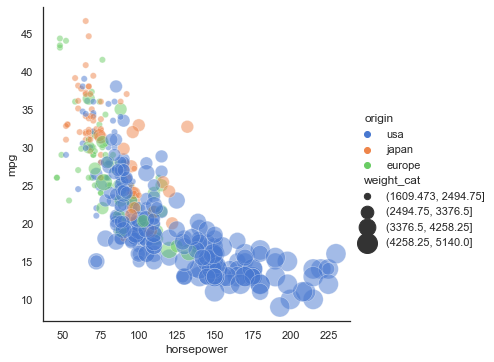

In [176]:
categories=4
mpg["weight_cat"] = pd.cut(mpg["weight"],bins=categories)
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight_cat",sizes=(400, 40), alpha=.5, palette="muted",height=5, data=mpg)

In [175]:
mpg["weight_cat"]

0        (3376.5, 4258.25]
1        (3376.5, 4258.25]
2        (3376.5, 4258.25]
3        (3376.5, 4258.25]
4        (3376.5, 4258.25]
              ...         
393      (2494.75, 3376.5]
394    (1609.473, 2494.75]
395    (1609.473, 2494.75]
396      (2494.75, 3376.5]
397      (2494.75, 3376.5]
Name: weight_cat, Length: 398, dtype: category
Categories (4, interval[float64]): [(1609.473, 2494.75] < (2494.75, 3376.5] < (3376.5, 4258.25] < (4258.25, 5140.0]]

**Hinweis** : `weight_cat` hat den `dtype` (Datentyp) `category` und diese sind **sortiert**

## Weg 1b: `pd.cut` mit `bins` = Liste 

Einteilung mit vorgabe einer Liste

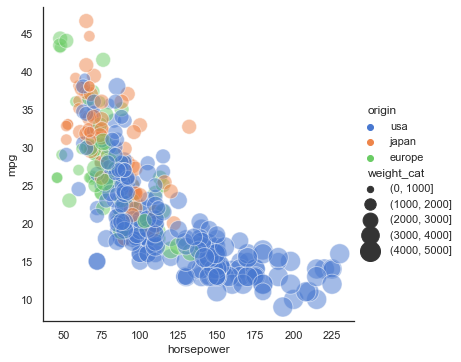

In [177]:
categories=[0,1000,2000,3000,4000,5000]
mpg["weight_cat"] = pd.cut(mpg["weight"],bins=categories)
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight_cat",sizes=(400, 40), alpha=.5, palette="muted",height=5, data=mpg)

## Weg 1c: `pd.cut` mit `bins` = Liste  mit selbstdefinierten `Labels`

Einteilung mit vorgabe einer Liste mit Labels

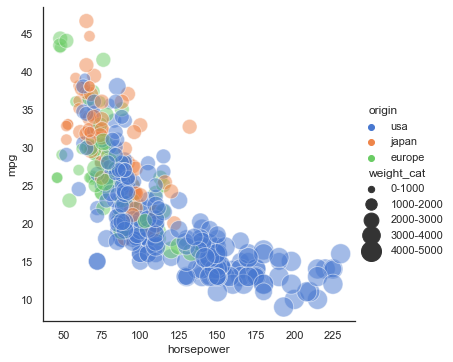

In [178]:
categories=[0,1000,2000,3000,4000,5000]
cat_label=["0-1000","1000-2000","2000-3000","3000-4000","4000-5000"]
mpg["weight_cat"] = pd.cut(mpg["weight"],bins=categories, labels=cat_label)
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight_cat",sizes=(400, 40), alpha=.5, palette="muted",height=5, data=mpg)

## Test mit Werten außerhalb der Kategorien

**Ergebnis**: Diese werden mit `NaN` definiert

In [183]:
categories=[1000,2000,3000]
cat_label=["{0}-{1}".format(i, i + 1000) for i in categories][0:-1]
mpg["weight_cat"] = pd.cut(mpg["weight"],bins=categories, labels=cat_label)
mpg.loc[(mpg["weight"] <= 1000) | (mpg["weight"] >= 3000)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,weight_cat
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,NaN
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,NaN
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,NaN
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,NaN
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,NaN
...,...,...,...,...,...,...,...,...,...,...
364,26.6,8,350.0,105.0,3725,19.0,81,usa,oldsmobile cutlass ls,NaN
365,20.2,6,200.0,88.0,3060,17.1,81,usa,ford granada gl,NaN
366,17.6,6,225.0,85.0,3465,16.6,81,usa,chrysler lebaron salon,NaN
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl,NaN


# Kategorien für numerische Daten festlegen mit `pd.qcut`

Unterschied `pd.cut` und `pd.qcut`

`pd.cut` teilt zwischen `Min` und `Max` in die durch `bins` vorgegebenen Bereiche **in gleichem Abstand**
`pd.qcut`teilt zwischen `Min` und `Max` in die durch `bins` vorgegebenen Bereiche **in Kategorien mit gleicher Anzahl an Werten ( also in Quantile )**

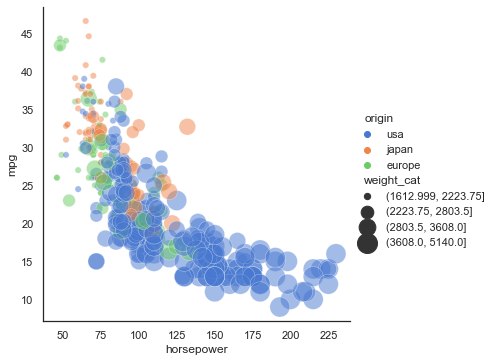

In [181]:
categories=4 # hier eigentlich Quantile
mpg["weight_cat"] = pd.qcut(mpg["weight"],q=categories)
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight_cat",sizes=(400, 40), alpha=.5, palette="muted",height=5, data=mpg)

# Kategorien für numerische Daten festlegen mit selbst definierte Funktion für Werte außerhalb des Bereichs

Die Funktion kategorisiert ebenfalls, führt aber zusätzlich einen letzten Eintrag ein in dem alle Werte definiert sind die größer sind

**Die neue Spalte ist kein `dtype=object`  (anders als bei pd.cut wo `dtype=category` ist)**

1. Definition der Schritte über `cat_steps`
2. Liste `categories` wird erstellt zum Labeln
3. Mit `mpg["weight_cat"] = mpg.apply(categorize, axis=1, args=["weight"])` wird eine **neue Kategoriespalte** erstellt indem  die Funktion auf jede Zeile angewandt wird
    - (`weight`) Name der Spalte die kategorisiert werden soll 
    - (`weight_cat`) Name der neuen Kategoriespalte
4. im Plot wird mit size_order=categories die Reihenfolge festgelegt


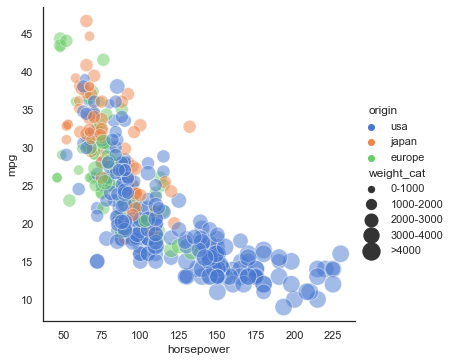

In [186]:
# Schritte der Kategorien
cat_steps=[0,1000,2000,3000,4000] 

# Funktion um in Kategorien einzuteilen
def categorize(row,colname):
    k=-1
    for i in cat_steps:
        k=k+1
        if k < len(cat_steps)-1:
            if (row[colname] >= cat_steps[k]) & (row[colname] < cat_steps[k+1]):
                val = str(cat_steps[k])+"-"+str(cat_steps[k+1])
        else:
            if row[colname] >= cat_steps[k]:
                val = ">"+str(cat_steps[k])
    return val

# Kateogrien erstellen (für Legende)
categories=[]
k=-1
for i in cat_steps:
    k=k+1
    if k < len(cat_steps)-1:
        categories.append(str(cat_steps[k])+"-"+str(cat_steps[k+1]))
    else:
        categories.append(">"+str(cat_steps[k]))


# Neue Kategoriespalte anlegen mit selbst definierter Funktion
mpg["weight_cat"] = mpg.apply(categorize, axis=1, args=["weight"])

                           
# Plot
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight_cat",size_order=categories,
            sizes=(300, 40), alpha=.5, palette="muted",
            height=5, data=mpg)


In [185]:
mpg["weight_cat"]

0      3000-4000
1      3000-4000
2      3000-4000
3      3000-4000
4      3000-4000
         ...    
393    2000-3000
394    2000-3000
395    2000-3000
396    2000-3000
397    2000-3000
Name: weight_cat, Length: 398, dtype: object

## test

In [ ]:
# Schritte der Kategorien
cat_steps=[0,1000,2000,3000,4000] 

# Funktion um in Kategorien einzuteilen
def categorize(row,colname):
    k=-1
    for i in cat_steps:
        k=k+1
        if k < len(cat_steps)-1:
            if (row[colname] >= cat_steps[k]) & (row[colname] < cat_steps[k+1]):
                val = str(cat_steps[k])+"-"+str(cat_steps[k+1])
        else:
            if row[colname] >= cat_steps[k]:
                val = ">"+str(cat_steps[k])
    return val

# Kateogrien erstellen (für Legende)
categories=[]
k=-1
for i in cat_steps:
    k=k+1
    if k < len(cat_steps)-1:
        categories.append(str(cat_steps[k])+"-"+str(cat_steps[k+1]))
    else:
        categories.append(">"+str(cat_steps[k]))


# Neue Kategoriespalte anlegen mit selbst definierter Funktion
mpg["weight_cat"] = mpg.apply(categorize, axis=1, args=["weight"])

                           
# Plot
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight_cat",size_order=categories,
            sizes=(300, 40), alpha=.5, palette="muted",
            height=5, data=mpg)


In [204]:
cat_steps

[0, 1000, 2000, 3000, 4000]